# Describe the three panels.

Loaded lars 1.2



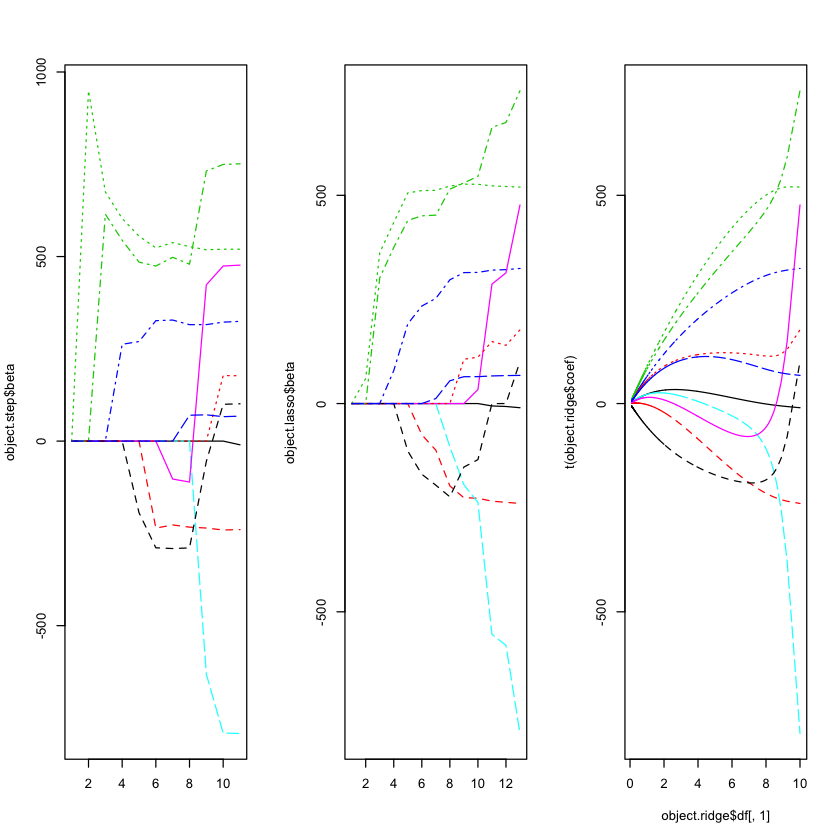

In [1]:
library(lars)
data(diabetes)
par(mfrow=c(1,2))
attach(diabetes)
object.step <- lars(x,y,type="stepwise")
object.lasso <- lars(x,y,type="lasso")

library(ridge)
lambda <-seq(from=1,to=0,length=100)
lambda <- seq(from=100,to=0,length=10000)
object.ridge <- linearRidge(y ~ x,lambda=lambda)

detach(diabetes)

par(mfcol=c(1,3))
matplot(object.step$beta,type="l")
matplot(object.lasso$beta,type="l")
matplot(object.ridge$df[,1],t(object.ridge$coef),type="l")
par(mfcol=c(1,1))

# Also write the formula for three methods and add description on them.

#1 Stepwise
$$
Cp=\frac{SSE}{S^2}-n+2m\\
SSE=\sum_{i=1}^n\{y_i-f(x_i)\}^2
$$

n:サンプル数、m:説明変数の数、$S^2$:すべての説明変数を用いて回帰分析を行ったときの誤差の二乗の平均、$y_i$:i番目のサンプルにおける目的変数の値、$f(x_i)$:i番目のサンプルにおける目的変数の推定値

SSEは最小二乗法の式であり、これが最小になるように回帰係数βを推定する。  
Cpは小さいほど良く、選ばれていない説明変数の中から一つ選んで追加してCpの値を計算し、もっともCpが小さくなる変数を順番に選んでいくのがstepwise法である。

#2 Lasso

\begin{aligned}
\boldsymbol{S}_{\lambda}(\boldsymbol{\beta})  = ||\boldsymbol{y}-\boldsymbol{X\beta}||^2 + \lambda||\boldsymbol{\beta}||_1 
\end{aligned}

これは最小二乗法の数式に$\lambda||\boldsymbol{\beta}||_1 $という正則化（罰則）項を加えたものである。一次の場合はL1正則化といい、これがLasso法である。  
Stepwiseの場合は変数の選択とモデルの推定を別々に行う必要があったが、Lassoではβの一部がゼロになることで、変数選択とモデルの推定が同時に行える。

#3 Ridge

\begin{aligned}
\boldsymbol{S}_{\lambda}(\boldsymbol{\beta})  = ||\boldsymbol{y}-\boldsymbol{X\beta}||^2 + \lambda||\boldsymbol{\beta}||^2
\end{aligned}

これは上記のLassoの正則化項を二次にしたもので、L2正則化と言われる。正則化項は係数βの二乗和となっており、この数式はβについて偏微分できる。  
偏微分した値がゼロとなるようなβを求めるので、

\begin{aligned}
\boldsymbol{\beta}_{\text{ridge}} & = argmin_{\boldsymbol{\beta} \in \mathcal{R^p}} \biggl[ ||\boldsymbol{y}-\boldsymbol{X\beta}||^2 + \lambda ||\boldsymbol{\beta}||^2 \biggr] \\\\
& = (\boldsymbol{X}^T\boldsymbol{X} + \lambda\boldsymbol{I_{p+1}})^{-1}\boldsymbol{X}^T\boldsymbol{y}
\end{aligned}

とβを求められる。  
βはゼロに近づいてもゼロにはならないので、全ての変数が使われることになりモデルは滑らかだが複雑になる。